<figure>
  <IMG SRC="https://raw.githubusercontent.com/mbakker7/exploratory_computing_with_python/master/tudelft_logo.png" WIDTH=250 ALIGN="right">
</figure>

# Exploratory Computing with Python
*Developed by Mark Bakker with additions by Theo Olsthoorn*

## Notebook 5: Time series data and Pandas

In [198]:
# We will probably need these
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Loading real data with Pandas
Real data is often stored in CSV files (Comma Separated Values).
So far, we have loaded csv files with the `np.loadtxt` command. 
The `loadtxt` function has some basic functionality and works just fine, but when we have more elaborate data sets we want more sophisticated functionality. 
The most powerful and advanced package for data handling and analysis is called `pandas`. We will use only a few functions of the `pandas` package here. Full information on `pandas` can be found on the [pandas website](http://pandas.pydata.org/).

Consider the following dataset, which is stored in the file `transport.csv`. It shows the percentage of transportation kilometers by car, bus or rail for four countries. The dataset has four columns. 

`country, car, bus, rail`  
`some more explanations, yada yada yada`  
`France, 86.1, 5.3, 8.6`  
`Germany, 85.2, 7.1, 7.7`  
`Netherlands, 86.4, 4.6, 9`  
`United Kingdom, 88.2, 6.5, 5.3` 

This data file is loaded with the `read_csv` function of the `pandas` package. The `read_csv` function has many options. We will use three of them here. The rows that need to be skipped are defined with the `skiprows` keyword (in this case row 1 with the `yada yada` text). The `skipinitialspace` keyword is set to `True` so that the column name ' car' is loaded without the initial space that is in the data file. And the `index_col` keyword is set to indicate that the names in column 0 can be used as an index to select a row.

In [2]:
from pandas import read_csv
tran = read_csv('transport.csv', skiprows=[1], skipinitialspace=True, index_col=0)

`Pandas` loads data into a `DataFrame`. A `DataFrame` is like an array, but has many additional features that make it a very powerful datatype for data analysis. For starters, once you have loaded the data, you can print it to the screen

In [4]:
print(tran)

                 car  bus  rail
country                        
France          86.1  5.3   8.6
Germany         85.2  7.1   7.7
Netherlands     86.4  4.6   9.0
United Kingdom  88.2  6.5   5.3


When the DataFrame is large, you can still print it to the screen (`pandas` is smart enough not to show the entire DataFrame when it is very large), or you can simply print the first 5 lines of the DataFrame with the `.head()` function. 

### Basic DataFrame manipulation
The `read_csv` function returns what is called a DataFrame. The variable `tran` in the code above is now a DataFrame. The rows and columns of a DataFrame may have names, as you can see from printing the DataFrame to the screen. To find out which names are used for the columns, use the `keys` function, which is accessible with the dot syntax. You can loop through the names of the columns if you wish.

In [75]:
print('Names of columns:')
print(tran.keys())

print("\nAccessing rows of a Series, columns of a dataFrame or the major axis of a panel use keys()")
for k in tran.keys():
    print(k)

print("\nAccessing columns in a dataFrame:")
for k in tran.columns:
    print(k)

print("\nAccessing rows in a series or a dataFrame:")
for k in tran.index:
    print(k)


Names of columns:
Index(['car', 'bus', 'rail'], dtype='object', name='transport')

Accessing rows of a Series, columns of a dataFrame or the major axis of a panel use keys()
car
bus
rail

Accessing columns in a dataFrame:
car
bus
rail

Accessing rows in a series or a dataFrame:
France
Germany
Netherlands
United Kingdom


In [9]:
tran.columns

Index(['car', 'bus', 'rail'], dtype='object')

In [10]:
tran.index

Index(['France', 'Germany', 'Netherlands', 'United Kingdom'], dtype='object', name='country')

#### The name of the index of the rows and the columns

In [76]:
print("The name of the index of the dataFrame:")
tran.index.name

The name of the index of the dataFrame:


'country'

The column headers may be given a nname, 

In [77]:
tran.columns.name = 'transport'
tran

transport,car,bus,rail
country,,,
France,86.1,5.3,8.6
Germany,85.2,7.1,7.7
Netherlands,86.4,4.6,9.0
United Kingdom,88.2,6.5,5.3


### Indexing items in a dataFrame like in a numpy array by the method .iloc( )

Each DataFrame may be indexed just like an array, by specifying the row and column number using the `.iloc` syntax (which stands for *index location*), where column 0 is the column labeled `car` (since the column labeled as `country` was stored as an index when reading the csv file; more on that later).

In [30]:
print("Item from first row and second column:\n", tran.iloc[0,1])  # Gives the bus data for France
print("\nItem from second row and first column:\n", tran.iloc[1,0])  # Gives the car data for Germany
print("\nItem from row 3 and column 3:\n", tran.iloc[2,2])  # Gives the rail data for Netherlands

Item from first row and second column:
 5.3

Item from second row and first column:
 85.2

Item from row 3 and column 3:
 9.0


We can also print entire rows or columns. But when a single row or a single column is selected from a dataframe, it is no longer a dataframe but a pandas series object:

In [38]:
print("\nRow 4, a pandas series:\n",tran.iloc[3])  # All data for United Kindom
print("\nThis is neither an array nor a dataframe but a {} object.".format(type(tran.iloc[3])))
print("\nColumn 2:\n", tran.iloc[:,1])  # All data for bus
print("\nThis too is neither an array nor a dataframe by a {} object.".format(type(tran.iloc[:,1])))


Row 4, a pandas series:
 transport
car     88.2
bus      6.5
rail     5.3
Name: United Kingdom, dtype: float64

This is neither an array nor a dataframe but a <class 'pandas.core.series.Series'> object.

Column 2:
 country
France            5.3
Germany           7.1
Netherlands       4.6
United Kingdom    6.5
Name: bus, dtype: float64

This too is neither an array nor a dataframe by a <class 'pandas.core.series.Series'> object.


### Explicit indexing using the row and column index by method .loc( )

Indexing like an array is in fact a primitive way to access such high level objects like dataframes and series. A better way and more consistent and systematic way is indexing by means of the columns and row indexes.

One way is to use the `.loc` syntax instead of the `iloc` syntax. This is a bit more typing but *much* more explicit. The equivalent of the code cell above, but using indices by name is

In [48]:
print("France, bus :", tran.loc['France','bus'])
print("\nGermany','car", tran.loc['Germany','car'])
print("\nNetherlands','rail", tran.loc['Netherlands','rail'])
print("\n",tran.loc['United Kingdom'])
print("\n",tran.loc[:,'bus'])

print("\nThe series object has received the name of the original row or column in the dataframe printed at the bottom.")

France, bus : 5.3

Germany','car 85.2

Netherlands','rail 9.0

 transport
car     88.2
bus      6.5
rail     5.3
Name: United Kingdom, dtype: float64

 country
France            5.3
Germany           7.1
Netherlands       4.6
United Kingdom    6.5
Name: bus, dtype: float64

The series object has received the name of the original row or column in the dataframe printed at the bottom.


Because using the index is far more explicit to select from a pandas dataframe or series, we don't use it any more below.

### Selecting enitre columns, three ways

There are two alternative ways to access an entire column. First, you can simply specify the column name as an index, without having to use the `.loc` syntax. Second, the dot syntax may be used, like syntax `.column_name`, where `column_name` is the name of the column. Hence, the following three are equivalent

In [55]:
print(tran.loc[:,'car'])  # All rows of 'car' column
print('\n', tran['car'])   # 'car' column 
print('\n', tran.car)      # also the car column, but accessed as an attribute of object tran

print('\n', tran.car['France'])

country
France            86.1
Germany           85.2
Netherlands       86.4
United Kingdom    88.2
Name: car, dtype: float64

 country
France            86.1
Germany           85.2
Netherlands       86.4
United Kingdom    88.2
Name: car, dtype: float64

 country
France            86.1
Germany           85.2
Netherlands       86.4
United Kingdom    88.2
Name: car, dtype: float64

 86.1


### Selecting entire rows, use .loc( )

If you don't want an entire column but an entire row, use loc as above:

In [64]:
print(tran.loc["France"])

transport
car     86.1
bus      5.3
rail     8.6
Name: France, dtype: float64


### `numpy` functions for DataFrames

Series can be pretty much treated as arrays, especially when they contain data. Most `numpy` functions work on DataFrames, but they can also be accessed with the *dot* syntax, like `dataframe_name.function()`. Simply type 

`tran.` 

in a code cell and then hit the [tab] key to see all the functions that are available. In the code cell below, we compute the maximum value of transportation by car, the country corresponding to the maximum value of transportation by car, and the mean value of all transportation by car. You can also find all values larger than a specified value, just like for arrays:

In [82]:
print('Maximum car travel percentage:               ', tran.car.max())
print('Country with maximum car travel percentage:  ', tran.car.argmax())
print('Mean car travel percentage:                  ', tran.car.mean())

print('\nAll rail travel above 8 percent:')
print(tran.rail[tran.rail > 8])

Maximum car travel percentage:                88.2
Country with maximum car travel percentage:   United Kingdom
Mean car travel percentage:                   86.47500000000001

All rail travel above 8 percent:
country
France         8.6
Netherlands    9.0
Name: rail, dtype: float64


### Exercise 1. <a name="back1"></a>Average annual rainfall by country
The file `annual_precip.csv` contains the average yearly rainfall and total land area for all the countries in the world (well, there are some missing values);  the data is available on the website of the <a href="http://data.worldbank.org/">world bank</a>. Open the data file to see what it looks like (Notepad, Textedit, even Word if you have to). Load the data with the `read_csv` function of `pandas`, making sure that the names of the countries can be used to select a row, and perform the following tasks:

* Print the first 5 lines of the DataFrame to the screen with the `.head()` function.
* Print the average annual rainfall for Panama and make sure to include the units.
* Report the total land area of the Netherlands and make sure to include the units.
* Report all countries with an average annual rainfall less than 200 mm/year
* Report all countries with an average annual rainfall more than 2500 mm/year
* Report all countries with an average annual rainfall that is within 50 mm/year of the average annual rainfall in the Netherlands

In [85]:
from pandas import read_csv
rain = read_csv('annual_precip.csv', skiprows=2, index_col=0)
#
print('First five lines of rain dataset:')
print(rain.head())
#
print('\nAverage annual rainfall in Panama is',rain.loc['Panama','precip'],'mm/year')
#
print('\nLand area of the Netherlands is', rain.loc['Netherlands','area'], 'thousand km^2/year')
#
print('\nCountries where average rainfall is below 200 mm/year')
print(rain[ rain.precip < 200 ])
#
print('\nCountries where average rainfall is above 2500 mm/year')
print(rain[ rain.precip > 2500 ])
#
print('Countries with almost the same rainfall as Netherlands')
print(rain[abs(rain.loc['Netherlands','precip'] - rain.precip) < 50])

First five lines of rain dataset:
                precip    area
country                       
Afghanistan      327.0   652.2
Albania         1485.0    27.4
Algeria           89.0  2381.7
American Samoa     NaN     0.2
Andorra            NaN     0.5

Average annual rainfall in Panama is 2692.0 mm/year

Land area of the Netherlands is 33.7 thousand km^2/year

Countries where average rainfall is below 200 mm/year
                      precip    area
country                             
Algeria                 89.0  2381.7
Bahrain                 83.0     0.8
Egypt, Arab Rep.        51.0   995.5
Jordan                 111.0    88.8
Kuwait                 121.0    17.8
Libya                   56.0  1759.5
Mauritania              92.0  1030.7
Niger                  151.0  1266.7
Oman                   125.0   309.5
Qatar                   74.0    11.6
Saudi Arabia            59.0  2149.7
Turkmenistan           161.0   469.9
United Arab Emirates    78.0    83.6
Yemen, Rep.            167.0 

### Adding a column to a DataFrame
A column may be added to a DataFrame by simply specifying the name and values of the new column using the syntax `DataFrame['newcolumn']=something`. For example, let's add a column named `public_transport`, which is the sum of the `bus` and `rail` columns, and then find the country with the largest percentage of public transport

In [86]:
tran['public_transport'] = tran.bus + tran.rail
print('Country with largest percentage public transport:',tran.public_transport.argmax())

Country with largest percentage public transport: Germany


### Plotting DataFrames
You can plot the column or row of a DataFrame with the `matplotlib` functions, as we have done in previous Notebooks, but `pandas` has also implemented its own, much more convenient, plotting functions (still based on `matplotlib` in the background, of course). The plotting capabilities of `pandas` also use the *dot* syntax, like `dataframe.plot()`. All columns can be plotted simultaneously (note that the names appear on the axes and the legend is added automatically!).

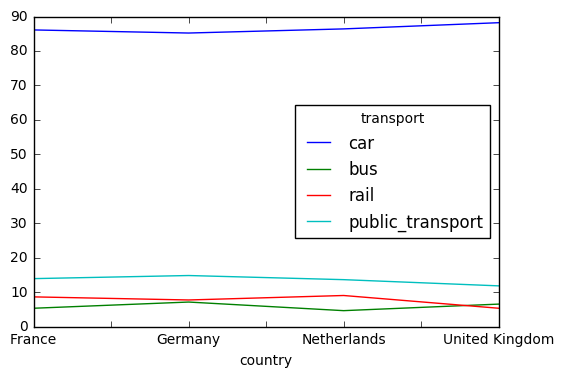

In [89]:
tran.plot();  # plot all columns
plt.show()

You can also plot one column at a time. The style of the plot may be specified with the `kind` keyword (the default is `'line'`). Check out `tran.plot?` for more options. 

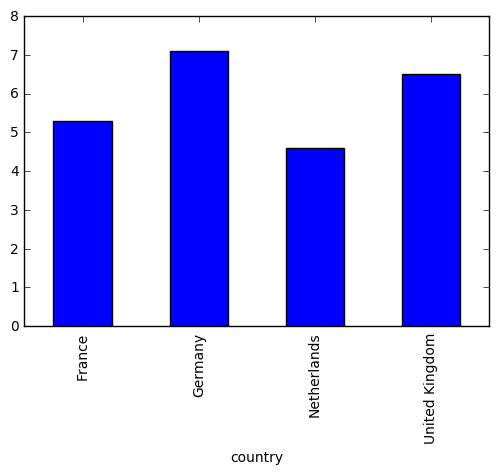

In [90]:
tran['bus'].plot(kind='bar')
plt.show()

### Sorting DataFrames
DataFrames may be sorted with the `.sort` function. The keyword `inplace=True` replaces the values in the DataFrame with the new sorted values (when `inplace=False` a new DataFrame is returned, which you can store in a separate variable so that you have two datasets, one sorted and one unsorted). The `sort` funcion has several keyword arguments, including `columns` which is either the name of one column to sort by or a list of columns so that data is sorted by the first specified column and when values are equal they are sorted by the next column in the list. Another keyword is `ascending`, which you can use to specify whether to sort in ascending order (`ascending=True`, which is the default), or descending order (`ascending=False`)

In [91]:
print('Data sorted by car use:')
print(tran.sort(columns='car'))
print('Data sorted by bus use:')
print(tran.sort(columns='bus'))

Data sorted by car use:
transport        car  bus  rail  public_transport
country                                          
Germany         85.2  7.1   7.7              14.8
France          86.1  5.3   8.6              13.9
Netherlands     86.4  4.6   9.0              13.6
United Kingdom  88.2  6.5   5.3              11.8
Data sorted by bus use:
transport        car  bus  rail  public_transport
country                                          
Netherlands     86.4  4.6   9.0              13.6
France          86.1  5.3   8.6              13.9
United Kingdom  88.2  6.5   5.3              11.8
Germany         85.2  7.1   7.7              14.8


/Users/Theo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app
/Users/Theo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


### Renaming columns
Sometimes (quite often, really), the name of columns in a dataset are not very convenient (long, including spaces, etc.). For the example of the transportation data, the columns have convenient names, but let's change them for demonstration purposes. You can rename columns inplace, and you can change as many columns as you want. The old and new names are specified with a Python dictionary. A dictionary is a very useful data type. It is specified between braces `{}`, and links a word in the dictionary to a value. The value can be anything. You can then use the word in the dictionary as the index, just like you would look up a word in an paper dictionary.

In [92]:
firstdictionary = {'goals': 20, 'city': 'Delft'}
print(firstdictionary['goals'])
print(firstdictionary['city'])

20
Delft


Much more on Python dictionaries can be found, for example, [here](http://learnpythonthehardway.org/book/ex39.html). Let's continue with renaming two of the columns of the `tran` DataFrame:

In [93]:
tran.rename(columns={'bus': 'BUS', 
                     'rail': 'train'}, inplace=True)
tran

transport,car,BUS,train,public_transport
country,,,,
France,86.1,5.3,8.6,13.9
Germany,85.2,7.1,7.7,14.8
Netherlands,86.4,4.6,9.0,13.6
United Kingdom,88.2,6.5,5.3,11.8


The index column, with the countries, is now called `'country'`, but we can rename that too, for example to `'somewhere in Europe'`, with the following syntax

In [94]:
tran.index.names = ['somewhere in Europe']
tran

transport,car,BUS,train,public_transport
somewhere in Europe,,,,
France,86.1,5.3,8.6,13.9
Germany,85.2,7.1,7.7,14.8
Netherlands,86.4,4.6,9.0,13.6
United Kingdom,88.2,6.5,5.3,11.8


### World population data

We'll read in the csv file worldPopulation.csv using pandas read_csv. Pandas read_csv as a large number of keywork options, most of wich can ben generally ignored so that their defaults are used. However the current file has two header lines that need to be handled.

First look at the options, their meaning can be found on the internet

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html



read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None,
         index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True,
         dtype=None, engine=None, converters=None, true_values=None, false_values=None,
         skipinitialspace=False, skiprows=None, skipfooter=None, nrows=None,
         na_values=None, keep_default_na=True, na_filter=True, verbose=False,
         skip_blank_lines=True, parse_dates=False, infer_datetime_format=False,
         keep_date_col=False, date_parser=None, dayfirst=False, iterator=False,
         chunksize=None, compression='infer', thousands=None, decimal=b'.',
         lineterminator=None, quotechar='"', quoting=0, escapechar=None, comment=None,
         encoding=None, dialect=None, tupleize_cols=False, error_bad_lines=True,
         warn_bad_lines=True, skip_footer=0, doublequote=True, delim_whitespace=False,
         as_recarray=False, compact_ints=False, use_unsigned=False, low_memory=True,
         buffer_lines=None, memory_map=False, float_precision=None)


We have a two-line header, so specify wich lines comprise this: header[0,1]
This will be about all we have to do to properly readin this entire file.

In [170]:
import pandas
worldPop = pandas.read_csv('worldPopulation2017.csv', header=[0, 1])
worldPop

,#,Country (or dependency),Population,Yearly,Net,Density,Land Area,Migrants,Fert.,Med.,Urban
,Unnamed: 0_level_1,Unnamed: 1_level_1,-2017,Change,Change,(P/Km2),(Km2),(net),Rate,Age,Pop %
0,1,China,1388232693,0.43%,5909361,148,9386293,-360000.0,1.55,37,57.60%
1,2,India,1342512706,1.18%,15711130,452,2973450,-519644.0,2.48,27,32%
2,3,U.S.,326474013,0.73%,2355226,36,9144930,1001577.0,1.89,38,82.10%
3,4,Indonesia,263510146,1.12%,2929046,146,1811066,-140000.0,2.5,28,53.40%
4,5,Brazil,211243220,0.80%,1675300,25,8349534,3185.0,1.82,31,83.50%
5,6,Pakistan,196744376,2.03%,3917874,255,770942,-216384.0,3.72,23,38.10%
6,7,Nigeria,191835936,2.59%,4848373,211,910902,-60000.0,5.74,18,47.80%
7,8,Bangladesh,164827718,1.18%,1916854,1266,130175,-445296.0,2.23,26,34.50%
8,9,Russia,143375006,-0.05%,-64826,9,16292614,223577.0,1.66,39,73.20%




It works, but the duble header line doesn't make us happy

There are two issues:

1) We rather have the country name as the row index
2) We don't want this ugly double line header above our columns.

Let's see what we can do about it using the options in read_csv.

One obvious thing to do is to tell read_csv to use the country column as the row index. This is done with the keyword col_index= .

The question is what to use for value. "Country" does not work (try it) because you can't access a column by name if it has more levels (here two). In that case just use the column number, says the error message that you get when you try it. So we use `index_col=1`

In [172]:
import pandas
worldPop = pandas.read_csv('worldPopulation2017.csv', header=[0, 1], index_col=1)
worldPop

,1,"(Population, -2017)","(Yearly, Change)","(Net, Change)","(Density, (P/Km2))","(Land Area, (Km2))","(Migrants, (net))","(Fert., Rate)","(Med., Age)","(Urban, Pop %)"
China,1,1388232693,0.43%,5909361,148,9386293,-360000.0,1.55,37,57.60%
India,2,1342512706,1.18%,15711130,452,2973450,-519644.0,2.48,27,32%
U.S.,3,326474013,0.73%,2355226,36,9144930,1001577.0,1.89,38,82.10%
Indonesia,4,263510146,1.12%,2929046,146,1811066,-140000.0,2.5,28,53.40%
Brazil,5,211243220,0.80%,1675300,25,8349534,3185.0,1.82,31,83.50%
Pakistan,6,196744376,2.03%,3917874,255,770942,-216384.0,3.72,23,38.10%
Nigeria,7,191835936,2.59%,4848373,211,910902,-60000.0,5.74,18,47.80%
Bangladesh,8,164827718,1.18%,1916854,1266,130175,-445296.0,2.23,26,34.50%
Russia,9,143375006,-0.05%,-64826,9,16292614,223577.0,1.66,39,73.20%
Mexico,10,130222815,1.24%,1590811,67,1943624,-104717.0,2.29,27,77.30%



This is better. But we still don't like the header above all the other columns.

It's easy to replace headings at any time with strings or other immutable objects of our liking.

Let's first see what these column headers look like.

In [173]:
worldPop.columns

Index([                      1, ('Population', '-2017'),
          ('Yearly', 'Change'),       ('Net', 'Change'),
        ('Density', '(P/Km2)'),  ('Land Area', '(Km2)'),
         ('Migrants', '(net)'),       ('Fert.', 'Rate'),
               ('Med.', 'Age'),      ('Urban', 'Pop %')],
      dtype='object')

This is a list of tuples, which can be more easily seen by printing each tuple on its own line.

In [176]:
for p in worldPop.columns: print(p)

1
('Population', '-2017')
('Yearly', 'Change')
('Net', 'Change')
('Density', '(P/Km2)')
('Land Area', '(Km2)')
('Migrants', '(net)')
('Fert.', 'Rate')
('Med.', 'Age')
('Urban', 'Pop %')


An idea is to join the strings from the two lines.
And when done replace the first, which is not a tuple to the string "idx"

In [190]:
nwCols = [p[0] + p[1] if isinstance(p, tuple) else p for p in worldPop.columns]
print(nwCols)

[1, 'Population-2017', 'YearlyChange', 'NetChange', 'Density(P/Km2)', 'Land Area(Km2)', 'Migrants(net)', 'Fert.Rate', 'Med.Age', 'UrbanPop %']


In [191]:
nwCols[0] = "Idx"
for p in nwCols: print(p)

Idx
Population-2017
YearlyChange
NetChange
Density(P/Km2)
Land Area(Km2)
Migrants(net)
Fert.Rate
Med.Age
UrbanPop %


Nice, but some cleanup is still desired. We can do that with a few string methods placed in succession.

In [192]:
nc = [p.replace(' ','').replace('.','').replace('%','Perc') for p in nwCols]
print(nc)

['Idx', 'Population-2017', 'YearlyChange', 'NetChange', 'Density(P/Km2)', 'LandArea(Km2)', 'Migrants(net)', 'FertRate', 'MedAge', 'UrbanPopPerc']


In [194]:
worldPop.columns = nc
worldPop

,Idx,Population-2017,YearlyChange,NetChange,Density(P/Km2),LandArea(Km2),Migrants(net),FertRate,MedAge,UrbanPopPerc
China,1,1388232693,0.43%,5909361,148,9386293,-360000.0,1.55,37,57.60%
India,2,1342512706,1.18%,15711130,452,2973450,-519644.0,2.48,27,32%
U.S.,3,326474013,0.73%,2355226,36,9144930,1001577.0,1.89,38,82.10%
Indonesia,4,263510146,1.12%,2929046,146,1811066,-140000.0,2.5,28,53.40%
Brazil,5,211243220,0.80%,1675300,25,8349534,3185.0,1.82,31,83.50%
Pakistan,6,196744376,2.03%,3917874,255,770942,-216384.0,3.72,23,38.10%
Nigeria,7,191835936,2.59%,4848373,211,910902,-60000.0,5.74,18,47.80%
Bangladesh,8,164827718,1.18%,1916854,1266,130175,-445296.0,2.23,26,34.50%
Russia,9,143375006,-0.05%,-64826,9,16292614,223577.0,1.66,39,73.20%
Mexico,10,130222815,1.24%,1590811,67,1943624,-104717.0,2.29,27,77.30%


### There is yet another issue

That is, that some columns have NaN for not available while other columns have the string 'N.A.' for the same thing.

In [208]:
worldPop[["Migrants(net)", "FertRate"]] # we don't have to use .loc for entire columns

,Migrants(net),FertRate
China,-360000.0,1.55
India,-519644.0,2.48
U.S.,1001577.0,1.89
Indonesia,-140000.0,2.5
Brazil,3185.0,1.82
Pakistan,-216384.0,3.72
Nigeria,-60000.0,5.74
Bangladesh,-445296.0,2.23
Russia,223577.0,1.66
Mexico,-104717.0,2.29


The 'N.A.' are not considered NaN but just as string values. Let's replace them or read the worldPop file in once more by specifying that 'N.A' should be interpreted as not available. The keyword is na_values='N.A'

In [242]:
import pandas
worldPop = pandas.read_csv('worldPopulation2017.csv', header=[0, 1], index_col=1, na_values='N.A.')

# also replace the headers as was done before
nwCols = [p[0] + p[1] if isinstance(p, tuple) else p for p in worldPop.columns]
nwCols[0] = "Idx"
worldPop.columns = [p.replace(' ','').replace('.','').replace('%','Perc') for p in nwCols]

# and show it
worldPop

,Idx,Population-2017,YearlyChange,NetChange,Density(P/Km2),LandArea(Km2),Migrants(net),FertRate,MedAge,UrbanPopPerc
China,1,1388232693,0.43%,5909361,148,9386293,-360000.0,1.55,37.0,57.60%
India,2,1342512706,1.18%,15711130,452,2973450,-519644.0,2.48,27.0,32%
U.S.,3,326474013,0.73%,2355226,36,9144930,1001577.0,1.89,38.0,82.10%
Indonesia,4,263510146,1.12%,2929046,146,1811066,-140000.0,2.50,28.0,53.40%
Brazil,5,211243220,0.80%,1675300,25,8349534,3185.0,1.82,31.0,83.50%
Pakistan,6,196744376,2.03%,3917874,255,770942,-216384.0,3.72,23.0,38.10%
Nigeria,7,191835936,2.59%,4848373,211,910902,-60000.0,5.74,18.0,47.80%
Bangladesh,8,164827718,1.18%,1916854,1266,130175,-445296.0,2.23,26.0,34.50%
Russia,9,143375006,-0.05%,-64826,9,16292614,223577.0,1.66,39.0,73.20%
Mexico,10,130222815,1.24%,1590811,67,1943624,-104717.0,2.29,27.0,77.30%


Let's ask questions:

In [237]:
# Which countries have more people than the US?

worldPop.loc[worldPop["Population-2017"] > worldPop.loc["U.S.", "Population-2017"]]

,Idx,Population-2017,YearlyChange,NetChange,Density(P/Km2),LandArea(Km2),Migrants(net),FertRate,MedAge,UrbanPopPerc
China,1,1388232693,0.43%,5909361,148,9386293,-360000.0,1.55,37.0,57.60%
India,2,1342512706,1.18%,15711130,452,2973450,-519644.0,2.48,27.0,32%


In [238]:
# Wich countries are larger than Nigeria in 25 years?

p17 = "Population-2017"
p50 = "Population-2050"

worldPop[p50] = worldPop[p17] * (1 + worldPop["FertRate"]/100) ** (2050 - 2017)

In [239]:
worldPop

,Idx,Population-2017,YearlyChange,NetChange,Density(P/Km2),LandArea(Km2),Migrants(net),FertRate,MedAge,UrbanPopPerc,Population-2050
China,1,1388232693,0.43%,5909361,148,9386293,-360000.0,1.55,37.0,57.60%,2.306215e+09
India,2,1342512706,1.18%,15711130,452,2973450,-519644.0,2.48,27.0,32%,3.013070e+09
U.S.,3,326474013,0.73%,2355226,36,9144930,1001577.0,1.89,38.0,82.10%,6.056060e+08
Indonesia,4,263510146,1.12%,2929046,146,1811066,-140000.0,2.50,28.0,53.40%,5.952301e+08
Brazil,5,211243220,0.80%,1675300,25,8349534,3185.0,1.82,31.0,83.50%,3.830671e+08
Pakistan,6,196744376,2.03%,3917874,255,770942,-216384.0,3.72,23.0,38.10%,6.566971e+08
Nigeria,7,191835936,2.59%,4848373,211,910902,-60000.0,5.74,18.0,47.80%,1.210116e+09
Bangladesh,8,164827718,1.18%,1916854,1266,130175,-445296.0,2.23,26.0,34.50%,3.412842e+08
Russia,9,143375006,-0.05%,-64826,9,16292614,223577.0,1.66,39.0,73.20%,2.468465e+08
Mexico,10,130222815,1.24%,1590811,67,1943624,-104717.0,2.29,27.0,77.30%,2.749046e+08


In [241]:
worldPop.loc[worldPop[p50] >= worldPop.loc["U.S.", p50]]

,Idx,Population-2017,YearlyChange,NetChange,Density(P/Km2),LandArea(Km2),Migrants(net),FertRate,MedAge,UrbanPopPerc,Population-2050
China,1,1388232693,0.43%,5909361,148,9386293,-360000.0,1.55,37.0,57.60%,2.306215e+09
India,2,1342512706,1.18%,15711130,452,2973450,-519644.0,2.48,27.0,32%,3.013070e+09
U.S.,3,326474013,0.73%,2355226,36,9144930,1001577.0,1.89,38.0,82.10%,6.056060e+08
Pakistan,6,196744376,2.03%,3917874,255,770942,-216384.0,3.72,23.0,38.10%,6.566971e+08
Nigeria,7,191835936,2.59%,4848373,211,910902,-60000.0,5.74,18.0,47.80%,1.210116e+09


### Time series data

In time series data, one of the columns represents dates, sometimes including times, together referred to as datetimes. `pandas` can be used to read csv files where one of the columns includes datetime data. You need to tell `pandas` which column contains datetime values and `pandas` will try to convert that column to datetime objects. Datetime objects are very convenient as specifics of the datetime object may be assessed with the dot syntax: `.year` returns the year, `.month` returns the month, etc.

For example, consider the following data stored in the file `timeseries1.dat`

`date, conc`  
`2014-04-01, 0.19`   
`2014-04-02, 0.23`   
`2014-04-03, 0.32`   
`2014-04-04, 0.29`   

The file may be read with `read_csv` using the keyword `parse_dates=[0]` so that column number 0 is converted to datetimes

In [96]:
data = read_csv('timeseries1.dat', parse_dates=[0])
print(data)

        date   conc
0 2014-04-01   0.19
1 2014-04-02   0.23
2 2014-04-03   0.32
3 2014-04-04   0.29
4 2014-04-05   0.32


The rows of the DataFrame `data` are numbered, as we have not told `pandas` what column to use as the index of the rows. The first column of the DataFrame `data` has datetime values. We can access, for example, the year, month, or day with the dot syntax

In [97]:
print('datetime of row 0:', data.iloc[0,0])
print('year  of row 0:', data.iloc[0,0].year)
print('month of row 0:', data.iloc[0,0].month)
print('day   of row 0:', data.iloc[0,0].day)

datetime of row 0: 2014-04-01 00:00:00
year  of row 0: 2014
month of row 0: 4
day   of row 0: 1


Time series data may also contain the time in addition to the date. For example, the data of the file `timeseries2.dat`, shown below, contains the day and time. You can access the `hour` or `minutes`, but also the time of a row of the DataFrame with the `.time()` function.

`date, conc`   
`2014-04-01 12:00:00, 0.19`   
`2014-04-01 13:00:00, 0.20`  
`2014-04-01 14:00:00, 0.23`  
`2014-04-01 15:00:00, 0.21` 

In [98]:
data = read_csv('timeseries2.dat', parse_dates=[0])
print(data)
print('hour  of row 0:', data.iloc[0,0].hour)
print('minute  of row 0:', data.iloc[0,0].minute)
print('time of row 0:', data.iloc[0,0].time())

                 date   conc
0 2014-04-01 12:00:00   0.19
1 2014-04-01 13:00:00   0.20
2 2014-04-01 14:00:00   0.23
3 2014-04-01 15:00:00   0.21
hour  of row 0: 12
minute  of row 0: 0
time of row 0: 12:00:00


### Exercise 3,  <a name="back3"></a>Load and plot daily rainfall
Rainfall data for the Netherlands may be obtained from the website of the Royal Dutch Meteorological Society <A href="http://www.knmi.nl/climatology/daily_data/selection.cgi">KNMI</A> . Daily rainfall for the weather station Rotterdam in 2012 is stored in the file `rotterdam_rainfall_2012.txt`. First open the file in a text editor to see what the file looks like. At the top of the file, an explanation is given of the data in the file. Read this. Load the data file with the `read_csv` function of `pandas`. Use the keyword `skiprows` to skip all rows except for the row with the names of the columns. Use the keyword `parse_dates` to give either the name or number of the column that needs to be converted to a datetime. Don't forget the `skipinitialspace` keyword, else the names of the columns may start with a bunch of spaces. Perform the following tasks:
* Some rainfall values in the dataset may be -1 (read the header of the file to learn why); set all rainfall values that are less than zero to zero. 
* Use the `plot` function of `pandas` to create a line plot of the daily rainfall with the number of the day (so not the date) along the horizontal axis. 
* Use `matplotlib` functions to add labels to the axes and set the limits along the horizontal axis from 0 to 365. 
* Determine the maximum daily rainfall and the date of the maximum daily rainfall and print them to the screen.

In [99]:
rain = read_csv('rotterdam_rainfall_2012.txt',skiprows=9,
                parse_dates=['YYYYMMDD'],skipinitialspace=True)
rain.iloc[:,2] = rain.iloc[:,2] * 0.1
rain.RH[rain.RH<0] = 0
rain.RH.plot()
plt.xlabel('day')
plt.ylabel('daily rainfall (mm/day)')
plt.xlim(0,365)
print('Maximum daily rainfall',rain.RH.max())
print('Date of maximum daily rainfall',rain.YYYYMMDD[rain.RH.argmax()])

Maximum daily rainfall 22.4
Date of maximum daily rainfall 2012-12-22 00:00:00


/Users/Theo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### Exercise 4,  <a name="back4"></a>Compute monthly rainfall from daily rainfall
In this exercise we are going to compute the total monthly rainfall for 2012 in the City of Rotterdam using the daily rainfall measurements we loaded in the previous Exercise; later on in this Notebook we learn convenient functions from `pandas` to do this, but here we are going to do this with a loop. Create an array of 12 zeros to store the monthly totals and loop through all the days in 2012 to compute the total rainfall for each month. The month associated with each row of the DataFrame may be obtained with the `.month` syntax, as shown above. Print the monthly totals (in mm/month) to the screen and create a bar graph of the total monthly rainfall (in mm/month) vs. the month using the `plt.bar` function of matplotlib. 

In [101]:
monthlyrain = np.zeros(12)
for i in range(len(rain)):
    month = rain.iloc[i,1].month
    monthlyrain[month-1] += rain.iloc[i,2]
print(monthlyrain)
#
plt.bar(np.arange(12),monthlyrain,width=1)
plt.xlabel('month')
plt.ylabel('monthly rainfall (mm/month)')
plt.xticks(np.arange(12)+0.5,['J','F','M','A','M','J','J','A','S','O','N','D'])
plt.xlim(0,12)

[  83.    24.3   21.9   57.6   76.5  119.   121.6   93.4   52.   132.6
   63.3  149.5]


(0, 12)

### Date times as index
The datetime of a dataset may also be used as the index of the DataFrame by specifying the column with the dates as the column to use for an index with the `index_col` keyword.  Note that datetimes are given as year-month-day, so `2012-04-01` means April 1, 2012.

In [102]:
data = read_csv('timeseries1.dat', parse_dates=[0], index_col=0)
print(data)
print('data on April 1:',data.loc['2014-04-01'])
print('data on April 2:',data.loc['2014-04-02'])

             conc
date             
2014-04-01   0.19
2014-04-02   0.23
2014-04-03   0.32
2014-04-04   0.29
2014-04-05   0.32
data on April 1:  conc    0.19
Name: 2014-04-01 00:00:00, dtype: float64
data on April 2:  conc    0.23
Name: 2014-04-02 00:00:00, dtype: float64


### Resampling
DataFrames have a very powerful feature called resampling. Downsampling refers to going from high frequency to low frequency. For example, going from daily data to monthly data. Upsampling refers to going from low frequency to high frequency. For example going from monthly data to daily data. For both upsampling and downsampling, you need to tell `pandas` how to perform the resampling. Here we discuss downsampling, where we computed monthly totals from daily values. First we load the daily rainfall in Rotterdam in 2012 from the file `rotterdam_rainfall_2012.txt` and specify the dates as the index (this is the column labeled as `YYYYMMDD`). We resample the rain to monthly totals using the `resample` function. You have to tell the `resample` function to what frequency it needs to resample. Common ones are `'A'` for yearly, `'M'` for monthly, `'W'` for weekly, `'D'` for daily, and `'H'` for hourly, but there are many other ones (see  [here](http://pandas.pydata.org/pandas-docs/version/0.12.0/timeseries.html).  The keyword argument `how` is used to tell `pandas` how to compute the resampled data. This can be many things, like `'mean'` for the mean (that is the default), `'sum'` for the total, `'min'`, `'max'`, etc. The keyword argument `kind` is used to tell `pandas` where to assign the computed value to. You can assign the computed value to the last day of the period, or the first day, or to the entire period (in this case the entire month). The latter is done by specifying `kind='period'`, which is what we will do here. Calculating the montly totals and making a bar graph can now be done with `pandas` as follows. 

In [103]:
rain = read_csv('rotterdam_rainfall_2012.txt', skiprows=9,
                parse_dates=['YYYYMMDD'], index_col='YYYYMMDD',
                skipinitialspace=True)
rain.RH[rain.RH<0] = 0
rain.RH = rain.RH * 0.1 # Convert to mm/day
monthlyrain = rain.RH.resample('M', how='sum', kind='period')
print(monthlyrain)
monthlyrain.plot(kind='bar')
plt.ylabel('mm/month')
plt.xlabel('month')

YYYYMMDD
2012-01     83.0
2012-02     24.3
2012-03     21.9
2012-04     57.6
2012-05     76.5
2012-06    119.0
2012-07    121.6
2012-08     93.4
2012-09     52.0
2012-10    132.6
2012-11     63.3
2012-12    149.5
Freq: M, Name: RH, dtype: float64


/Users/Theo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()


### Exercise 5,<a name="back5"></a> Resample weather data
The file `rotterdam_weather_2000_2010.txt` contains daily weather data at the weather station Rotterdam for the period 2000-2010 (again from the KNMI). Open the data file in an editor to see what is in it. Perform the following tasks:
* Load the data making sure the dates are used as index. 
* Convert the rain and evaporation to mm/day, and the temperature to degrees Celcius. 
* Set any negative rainfall (explained in the file) to zero. 
* Compute total yearly rainfall, total yearly evaporation, and mean yearly temperature. 
* Make a line plot of the yearly rainfall, yearly evaporation, and mean temperature using the `plot` function of `pandas`. Make sure to plot the mean temperature on the secondary $y$-axis (use the help function to find out how). 

In [104]:
weather = read_csv('rotterdam_weather_2000_2010.txt',skiprows=11,
                parse_dates=['YYYYMMDD'],index_col='YYYYMMDD',skipinitialspace=True)
weather.TG = 0.1 * weather.TG
weather.RH = 0.1 * weather.RH
weather.EV24 = 0.1 * weather.EV24
weather.RH[weather.RH<0] = 0
yearly_rain = weather.RH.resample('A', how='sum', kind='period')
yearly_evap = weather.EV24.resample('A', how='sum', kind='period')
yearly_temp = weather.TG.resample('A', how='mean', kind='period')
yearly_rain.plot()
yearly_evap.plot()
yearly_temp.plot(secondary_y=True)
plt.xlabel('Year')
plt.ylabel('Rain/evap (mm/year)');

/Users/Theo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Theo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
/Users/Theo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
/Users/Theo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:9: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
